<a href="https://colab.research.google.com/github/TumSim/python_data_analytics1/blob/main/Python_Kuvaileva_analytiikka_Tehtava1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/data

Mounted at /gdrive
/gdrive/MyDrive/data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# **Titanic tilastot**

Haetaan Drivesta titanic Excel-tiedosto.

In [3]:
df = pd.read_excel("titanic.xlsx")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


## Sukupuoli jakauma matkustajien kesken

In [4]:
Sukupuoli = ["Naiset", "Miehet"]

In [5]:
df1 = pd.crosstab(df["sex"], columns = "f")
df1.columns.name = ""
df1.index = Sukupuoli

n = df1["f"].sum()
df1

,f
Naiset,466
Miehet,843


Sukupuolien jakauma

Voidaan huomata matkustajien olevan suurimmaksi osaksi miehiä.
Ihmisten seikkailu halukkuus ja eriarvoisuus Titanicin aikaan voisi hyvin selittää mies voittoista matkustaja luetteloa.

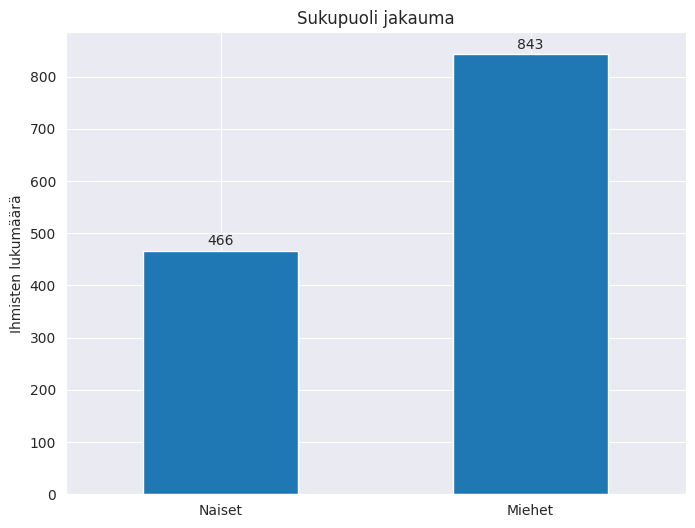

In [6]:
ax = df1['f'].plot(kind='bar', figsize=(8, 6))


ax.set_ylabel('Ihmisten lukumäärä')
ax.set_title('Sukupuoli jakauma')

plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, padding=2)

In [7]:
df1 = pd.crosstab(df["sex"], columns = "f")
df1.columns.name = ""
df1.index = Sukupuoli

n = df1["f"].sum()
df1["%"] = (df1["f"] / n) * 100

df1.loc["Yhteensä"] = df1.sum()
df1.style.format({"f" : "{:.0f}", "%" : "{:.1f} %"})


,f,%
Naiset,466,35.6 %
Miehet,843,64.4 %
Yhteensä,1309,100.0 %


Naisia on matkustajina vain 35,6%.



Text(0.5, 1.0, 'Sukupuoli jakauma / %')

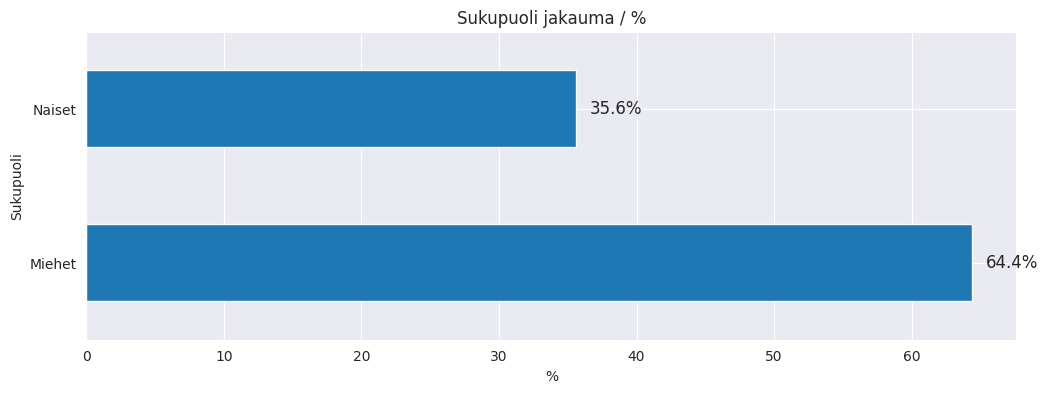

In [8]:
df1 = df1[df1.index != "Yhteensä"]


df1_sorted = df1.sort_values(by='%', ascending=False)

ax = df1_sorted['%'].plot(kind='barh', figsize=(12, 4))

for i, v in enumerate(df1_sorted['%']):
    ax.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=12)

ax.set_xlabel('%')
ax.set_ylabel('Sukupuoli')
ax.set_title('Sukupuoli jakauma / %')


## Titanicista selviytyneet

In [9]:
Selviytyneet = ["Menehtyneet", "Selviytyneet"]

In [10]:
df2 = pd.crosstab(df["survived"], columns = "f")
df2.columns.name = ""
df2.index = Selviytyneet

n = df2["f"].sum()
df2["%"] = (df2["f"] / n) * 100

df2.loc["Yhteensä"] = df2.sum()

df2.style.format({"f" : "{:.0f}", "%" : "{:.1f} %"})



,f,%
Menehtyneet,809,61.8 %
Selviytyneet,500,38.2 %
Yhteensä,1309,100.0 %


Titanicista selviyteneitä matkustjia oli yllättävän paljon.

Enemmän havainnollistaa prosenttuaalinen tutkinta selviytyneiden ja menehtyneiden kesken.

Yli 60% Titanicin matkustajista menehtyi.

(array([0, 1]), [Text(0, 0, 'Menehtyneet'), Text(1, 0, 'Selviytyneet')])

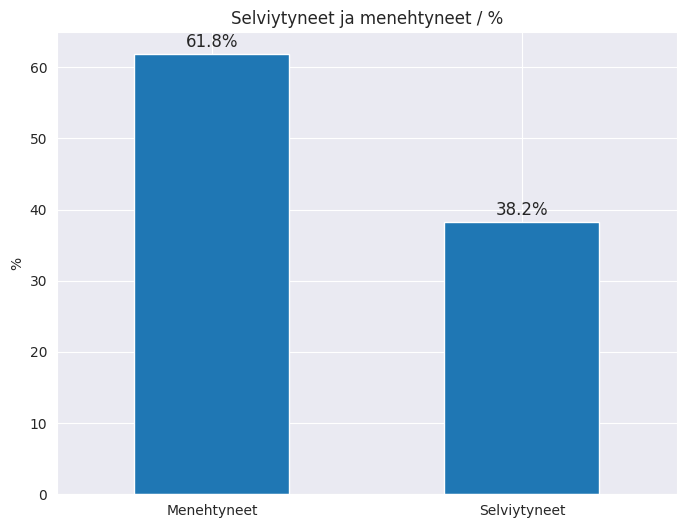

In [11]:
df2 = df2[df2.index != "Yhteensä"]

ax = df2['%'].plot(kind='bar', figsize=(8, 6))

for i, v in enumerate(df2["%"]):
    ax.text(i, v + 1, f'{v:.1f}%', ha="center", fontsize=12)

ax.set_ylabel("%")
ax.set_title("Selviytyneet ja menehtyneet / %")

plt.xticks(rotation=0)

Sukupuoli jakauma selviytyneiden kesken.

Tässä tapauksessa voisi hyvin käyttää fraasia "Naiset ja lapset ensin".
Tämä varmasti selittäisi osakseen suuren naisten selviytymisen Titanicista.

Pelastusveneet ovat täytetty aluksi naisilla ja lapsilla todennäköiseti.

In [12]:
df3 = pd.crosstab(df.survived, df.sex)
df3 = df3.rename(columns = {"female" : "Naiset", "male" : "Miehet"})
df3.columns.name = ""
df3.index.name = ""
df3.index = Selviytyneet
df3

,Naiset,Miehet
Menehtyneet,127,682
Selviytyneet,339,161


Text(0.5, 1.0, 'Menetyneet ja selviytyneet sukupuolittain')

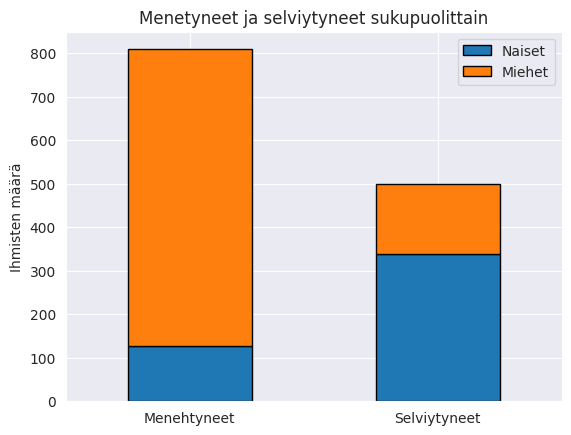

In [13]:
fig, ax = plt.subplots()
df3.plot(kind = "bar",
         stacked = True,
         ax = ax,
         edgecolor = "black")
ax.set_ylabel("Ihmisten määrä")
ax.tick_params(labelrotation = 0)
ax.set_title("Menetyneet ja selviytyneet sukupuolittain")

Tarkastellaan hieman Titanicin matkustajien ikäjakaumaa.

Matkustajat ovat hyvin eri-ikäisiä, mutta painottuu silti suurimmaksi osaksi nuoriin aikuisiin.

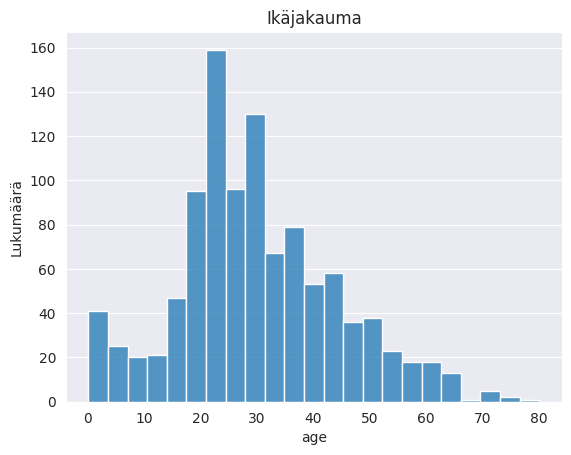

In [14]:
ax1 = sns.histplot(data = df, x = "age")

plt.title("Ikäjakauma")
plt.ylabel("Lukumäärä")

plt.grid(axis = "x")

In [15]:
bins = [0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90]
df["Ikäjakauma"] = pd.cut(df['age'], bins = bins, right = False)

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Ikäjakauma
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","[20.0, 30.0)"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","[0.0, 5.0)"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[0.0, 5.0)"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON","[30.0, 40.0)"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[20.0, 30.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,"[10.0, 15.0)"
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,"[20.0, 30.0)"
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,"[20.0, 30.0)"


Tarkastellessa menehtyneiden ja selviytyneiden määriä ikäjakaumittain hieman yllättää.

Voisi kuvitella nuorien ja lapsien osuuden selviytyneissä olleen suurempi kuin se on.

In [16]:
df4 = pd.crosstab(df.Ikäjakauma, df.survived)
df4.columns = Selviytyneet

df4

,Menehtyneet,Selviytyneet
Ikäjakauma,,
"[0, 5)",18,33
"[5, 10)",14,17
"[10, 15)",16,11
"[15, 20)",71,45
"[20, 30)",217,127
"[30, 40)",134,98
"[40, 50)",83,52
"[50, 60)",38,32
"[60, 70)",22,10


Joka tapauksessa alle 10-vuotiaiden kohdalla pystytään nähdä, että suurempi osa on selviytynyt, kuin menehtynyt.

Tällaista ei ole muissa ikäluokissa.


Huomiota myös herättää nuorien menehtyminen. Voisi kuvitella nuorien ihmisten selviytyneen paremmin turmasta, kuin mitä tilasto kertoo.

Text(0.5, 1.0, 'Menetyneet ja selviytyneet ikäjakauma')

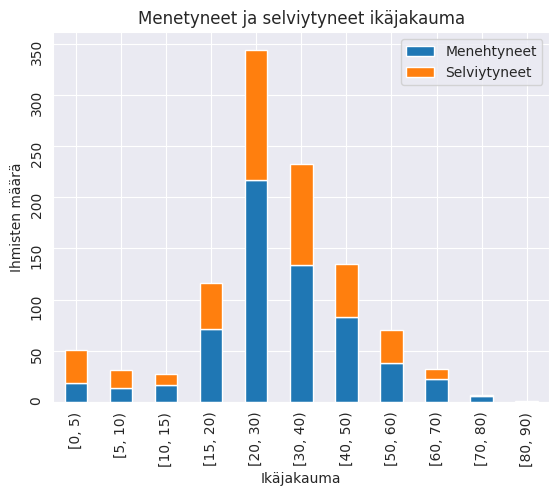

In [17]:
fig, ax = plt.subplots()
df4.plot(kind = "bar", stacked = True, ax = ax)
ax.set_ylabel("Ihmisten määrä")
ax.tick_params(labelrotation = 90)
ax.set_title("Menetyneet ja selviytyneet ikäjakauma")

# **Onnettomuudet**

In [18]:
df5 = pd.read_excel("onnettomuudet2021.xlsx")
pd.options.display.max_columns = None
df5

,Onnett_id,Tienpit,Tienpitsel,Tie,Aosa,Aet,Ajr,Vuosi,Kk,Päivä,Kuolleet,Loukkaant,Vakavuusko,Vakavuus,ELY,Elynimi,Poliisipri,Piirinimi,Tunti,Vkpv,Ontyyppi,Ontyypsel,Onluokka,Onlksel,Osallkm,Nopraj,Taajmerk,Taajamasel,Pinta,Pintasel,Valoisuus,Valsel,Sää,Sääsel,Onnpaikka,Onnpaiksel,Liikvalot,Liikvalsel,Liittyvtie,Maakunta,Maakuntsel,Kunta,Kuntasel,Noplaji,Noplajisel,Nopsuunvas,Nopsuunoik,Taajama,Mo_mol,Mo_molsel,Toimluokka,Toimlksel,Kvl,Raskaskvl,Tienlev,X,Y,Oslakpvm,Tietyö,Päällyste,Päällsel,Lämpötila,Risteys,Risteyssel,Rautatie,Rautatsel,Muuliit,Muuliitsel,Katuosoite,Tietyyppi,Tietyypsel,Talvhoitlk,Talvhoitsel,Tienverkas,Tienverkse,Maankäyttö,Maankäytse,Valoohjaus,Valoohjsel,Lisäkaisty,Lisäkaisse,Solmutyyp,Solmutyyps,Liitluok,Liitlksel,Lähliittie,Suuntlkm,Toimenpide,Toimpidsel,Luovpvm,Valaisomis,Valomsel,Poikkileik,Poikleikse,Päällyslev,Päällystlk,Päällksel,Nakos150,Nakos300,Nakos460,Runkotie,Alkoholi,Järjnro,Jutuntunn,Raskos,Solmunro
0,10205475,-1,Ei arvoa,NaN,NaN,NaN,NaN,2021,9,2021-09-11,0,0,0,Ei henkilövahinkoja,1,Uudenmaan ELY,5500,Helsingin poliisilaitos,16,Lauantai,40,ajo risteäviä ajosuuntia suoraan,4,risteämisonnettomuus,2,80,-1,Ei arvoa,1,"paljas, kuiva",1,päivänvalo,2,pilvipouta,1,ajorata,-1,Ei arvoa,NaN,1,Uusimaa,91,Helsinki,-1,Ei arvoa,-1,-1,,-1,Ei arvoa,-1,Ei arvoa,NaN,NaN,NaN,NaN,NaN,NaT,E,1,kestopäällyste,NaN,2,kärkikolmio,-1,Ei arvoa,-1,Ei arvoa,,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,NaN,NaN,-1,Ei arvoa,NaT,-1,Ei arvoa,-1,Ei arvoa,NaN,-1,Ei arvoa,NaN,NaN,NaN,NaN,0,49976,R,ei,NaN
1,10200513,1,Väylävirasto,1.0,3.0,9.0,2.0,2021,9,2021-09-26,0,0,0,Ei henkilövahinkoja,1,Uudenmaan ELY,5500,Helsingin poliisilaitos,10,Sunnuntai,52,kääntyminen vasemmalle toisen eteen tai kylkeen,4,risteämisonnettomuus,2,40,1,K,1,"paljas, kuiva",1,päivänvalo,1,kirkas,1,ajorata,1,toiminnassa,NaN,1,Uusimaa,91,Helsinki,1,tiekohtainen rajoitus,60,50,K,1,moottoritie,1,valtatie,26719.0,815.0,201.0,382585.0,6675850.0,NaT,E,1,kestopäällyste,11.0,4,liikennevalot,-1,Ei arvoa,-1,Ei arvoa,TURUNVÄYLÄ X HUOPALAHDENTIE,1,yleinen tie,1,liukkaudentorjunta ilman toimenpideaikaa,2,keskustan ohikulku kaava-alueella,2,muu maankäyttö,-1,Ei arvoa,3,lisäkaista kaikille,10,Moniajoratainen liittymä,1,liittymä,NaN,4.0,1,rakentaminen,1962-01-01,1,valtio omistaa,2,2 ajor,114.0,10,kovat asfaltit,97.0,76.0,57.0,1.0,0,48715,R,ei,10407.0
2,10084621,1,Väylävirasto,1.0,3.0,220.0,1.0,2021,8,2021-08-26,0,0,0,Ei henkilövahinkoja,1,Uudenmaan ELY,5500,Helsingin poliisilaitos,20,Torstai,80,suistuminen oikealle suoralla,1,yksittäisonnettomuus,1,80,0,E,2,"paljas, märkä",1,päivänvalo,2,pilvipouta,1,ajorata,-1,Ei arvoa,NaN,1,Uusimaa,91,Helsinki,1,tiekohtainen rajoitus,60,80,E,1,moottoritie,1,valtatie,26719.0,815.0,234.0,382357.0,6675921.0,NaT,E,1,kestopäällyste,13.0,0,linjaonnettomuus,-1,Ei arvoa,-1,Ei arvoa,Turunväylä,1,yleinen tie,1,liukkaudentorjunta ilman toimenpideaikaa,2,keskustan ohikulku kaava-alueella,2,muu maankäyttö,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,NaN,NaN,1,rakentaminen,1962-06-30,1,valtio omistaa,2,2 ajor,104.0,10,kovat asfaltit,97.0,76.0,57.0,1.0,0,42850,R,ei,13044.0
3,10079162,1,Väylävirasto,1.0,3.0,225.0,1.0,2021,8,2021-08-08,0,0,0,Ei henkilövahinkoja,1,Uudenmaan ELY,5500,Helsingin poliisilaitos,18,Sunnuntai,89,muu tieltä suistuminen,1,yksittäisonnettomuus,1,80,0,E,1,"paljas, kuiva",1,päivänvalo,2,pilvipouta,1,ajorata,-1,Ei arvoa,NaN,1,Uusimaa,91,Helsinki,1,tiekohtainen rajoitus,60,80,E,1,moottoritie,1,valtatie,26719.0,815.0,234.0,382352.0,6675921.0,NaT,E,1,kestopäällyste,21.0,0,linjaonnettomuus,-1,Ei arvoa,-1,Ei arvoa,TURUNVÄYLÄ,1,yleinen tie,1,liukkaudentorjunta ilman toimenpideaikaa,2,keskustan ohikulku kaava-alueella,2,muu maankäyttö,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,-1,Ei arvoa,NaN,NaN,1,rakentaminen,1962-06-30,1,valtio omistaa,2,2 ajor,104.0,10,kovat asfaltit,97.0,76.0,57.0,1.0,0,39200,R,ei,13044.0
4,10086234,1,Väylävirasto,1.0,3.0,368.0,2.0,2021,8,2021-08-06,1,0,1,Kuolemaan johtanut,1,

Tutkitaan onnettomuuksien määrää kuukausi kohtaisesti.

Pimeimpien ja liukkaiden talvikuukausien aikaan voidaan luonnollisesti nähdä suurempia määriä onnettomuuksia kuin muina aikoina. Joka tapauksessa erot eivät ole niin suuria kuin voisi kuvitella.

Merkittävää on kesäkuukausien tilastot. Runsaisiin tilastoihin voisi luultavasti vaikuttaa ihmisten kesälomat. Ihmiset liikkuvat hyvin paljon enemmän tapahtumiin ja mökeille kesäaikaan.

<ipython-input-19-77e769f8aca7>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Kuukaudet, rotation=90)


Text(0.5, 1.0, 'Onnettomuudet kuukausittain (Pois lukien joulukuu)')

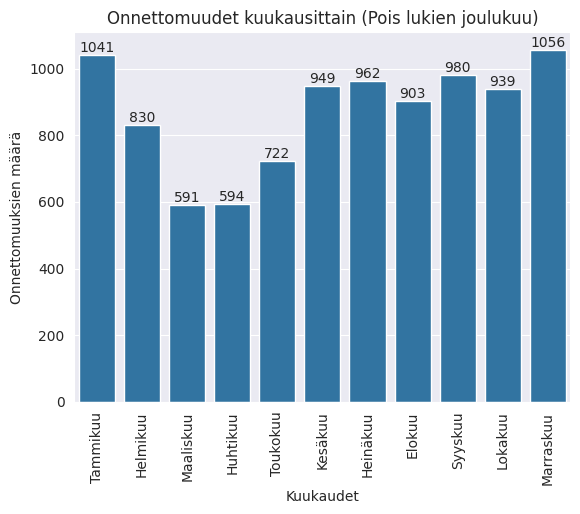

In [19]:
Kuukaudet = ["Tammikuu", "Helmikuu", "Maaliskuu", "Huhtikuu", "Toukokuu", "Kesäkuu", "Heinäkuu", "Elokuu", "Syyskuu", "Lokakuu", "Marraskuu"]
ax = sns.countplot(data=df5, x="Kk")
for label in ax.containers:
    ax.bar_label(label)
ax.set_xticklabels(Kuukaudet, rotation=90)
ax.set_ylabel("Onnettomuuksien määrä")
ax.set_xlabel("Kuukaudet")
ax.set_title("Onnettomuudet kuukausittain (Pois lukien joulukuu)")

Onnettomuuksia viikonpäivän mukaan voidaan nähdä hyvin oletettu näkymä. Viikonloppua kohti perjantaina onnettomuuksia sattuu enemmän kuin muina päivinä. Ihmiset liikkuvat perjantaisin omiin menoihinsa ja mökeille, joka luonnollisesti nostaa onnettomuuksien riskiä.

Sunnuntai normaalisesti ihmiset rauhottuvat ja ovat kotona suurimmaksi osaksi, joka suoraan vaikuttaa onnettomuuksien määriin.

Text(0.5, 1.0, 'Onnettomuudet jaoteltuna viikonpäiville')

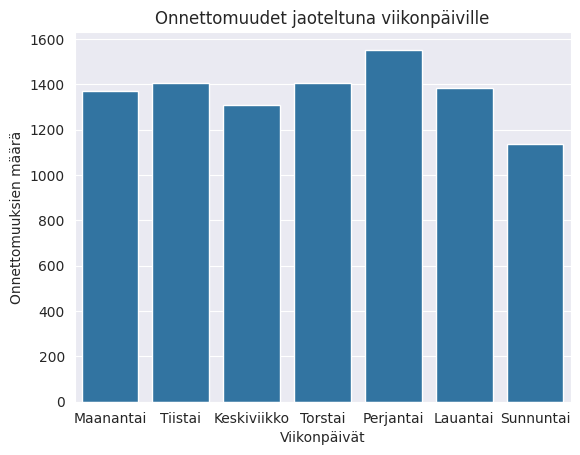

In [20]:
ax = sns.countplot(data=df5, x="Vkpv",
                   order= ["Maanantai", "Tiistai", "Keskiviikko", "Torstai", "Perjantai", "Lauantai", "Sunnuntai"])
ax.set_ylabel("Onnettomuuksien määrä")
ax.set_xlabel("Viikonpäivät")
ax.set_title("Onnettomuudet jaoteltuna viikonpäiville")

Tarkastellaan onnettomuuksia maakunnittain

In [21]:
df6 = pd.crosstab(df5["Maakuntsel"], "f")
n = df6["f"].sum()
df6["%"] = (df6["f"] / n) * 100

df6.columns.name = ""
df6.index.name = ""
df6.style.format({"f" : "{:.0f}", "%" : "{:.1f} %"})

,f,%
,,
Etelä-Karjala,152,1.6 %
Etelä-Pohjanmaa,431,4.5 %
Etelä-Savo,286,3.0 %
Kainuu,175,1.8 %
Kanta-Häme,364,3.8 %
Keski-Pohjanmaa,139,1.5 %
Keski-Suomi,532,5.6 %
Kymenlaakso,388,4.1 %
Lappi,331,3.5 %


Luonnollisesti voidaan nähdä Uusimaalla tapahtuvan kaikista eniten onnettomuuksia. Uusimaan väkiluku on huomattavasti suurempi, kuin muissa maakunnisa. Tämä tarkoittaa myös suurempaa todennäköisyyttä onnettomuuksille.

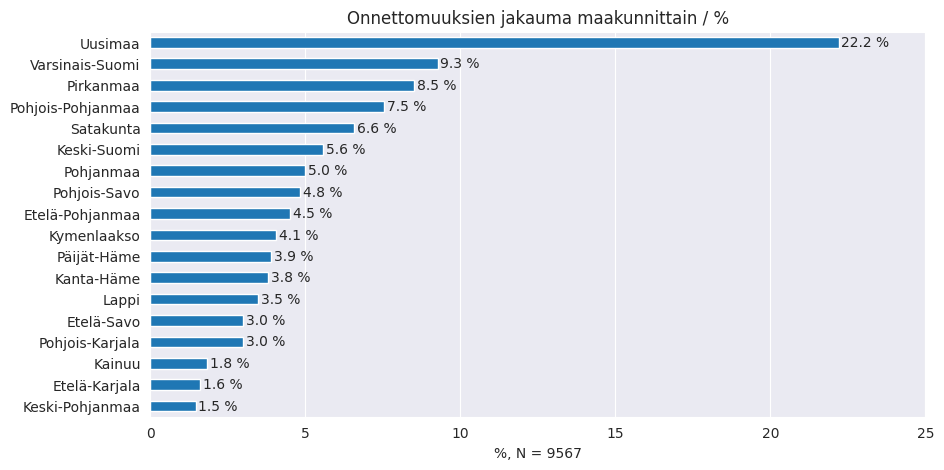

In [22]:
df6_sorted = df6.sort_values("f")
ax = df6_sorted["%"].plot.barh(figsize = (10,5))

plt.title("Onnettomuuksien jakauma maakunnittain / %")
plt.xlabel(f"%, N = {n}")
plt.grid(axis = "y")
plt.xlim(0, 25)

for container in ax.containers:
    ax.bar_label(container, padding=2, fmt='{:.1f} %')

Toisin kuin aikasemmassa tarkastelussa kuukausittain kaaviossa, oli tulkittavissa, että talvikuukausina onnettomuuksia sattuu eniten.

Voidaan kumminkin nähdä, että sään puolesta onnettomuudet nimenomaan tapahtuvat kuivalla ja kirkkaalla säällä.

Onnettomuuksien määrää kuivalla ja selkeällä säällä voisi selittää ylinopeudet, sekä alkoholi. Hyvin usein ihmiset ajavat kesäaikaan suuremmalla nopeudella ja valitetttavasti rattijuopumus tapauksia on useasti.

Ihanteellinen ajosää saa ihmiset ajamaan kovempaa, eikä välttämättä keskity liikenteessä samalla tavalla kuin talven liukkailla teillä.

In [23]:
df8 = pd.crosstab(df5.Sääsel, df5.Pintasel)
df8.columns.name = ""
df8.index.name = "Sääselite"
df8

,Ei arvoa,ajourat paljaat,jäinen,luminen,"paljas, kuiva","paljas, märkä",sohjoinen,urissa vettä
Sääselite,,,,,,,,
Ei arvoa,687,1,13,19,37,16,2,1
kirkas,112,72,359,206,2932,157,14,1
lumisade,14,11,180,360,1,7,37,0
pilvipouta,93,74,424,319,1748,587,54,4
räntäsade,1,1,10,7,0,31,56,2
sumu,2,1,12,2,16,37,9,0
vesisade,25,2,35,2,3,693,23,55
